# Part 1: Exploratory Data Analysis
In this first notebook, we'll do an exploratory data analysis on the raw Titanic dataset. This will include the following:

- Importing the raw dataset from the CSV file as a Pandas DataFrame
- Viewing the the Pandas DataFrame in its raw format
- Making some basic visualizations of the numerical features

Once we have a general idea of how we might begin to form this model, we'll move into the next notebook where we will begin feature engineering.

In [17]:
# Import the required Python libaries here
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# Import the data here
df = pd.read_csv('../data/raw/titanic-train-raw.csv')
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
# View the first couple rows of the data here

'''
Survived - No = 0; Yes = 1
Pclass - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)
Sibsp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Embarked - Port of Embarkment (C = Cherbourg; Q = Queenstown; S = Southampton)
'''

df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
# View all the data types, nulls, and more here (Hint: Pandas info function)
df.info()


df.drop(columns = ['PassengerId', 'Ticket', 'Cabin'], inplace = True) # these are probably not useful
nan_rows  = df[df.isna().any(axis=1)]
print("There are " + str(len(nan_rows)) + " number of rows that have passangers with either no assigned cabin or an unverified age.")





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
There are 179 number of rows that have passangers with either no assigned cabin or an unverified age.


In [21]:
df.head(15)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C


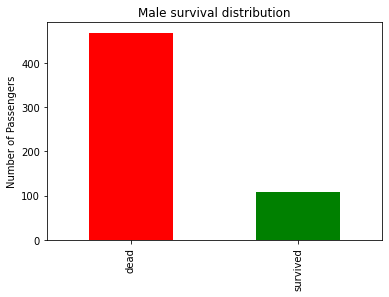

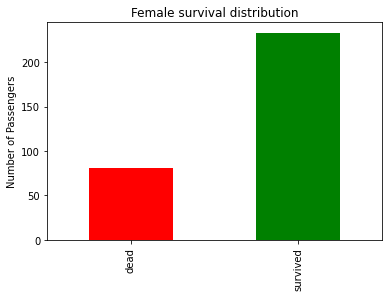

In [22]:
# Start doing some basic visualizations of the numerical features here and in subsequent, additional cells

male = df[df["Sex"]=="male"]["Survived"].value_counts().plot(kind="bar", color = ['r','g'])
male.set_xticklabels(["dead", "survived"])
male.set(ylabel = "Number of Passengers")
male.set_title(label="Male survival distribution")
plt.show()

female = df[df["Sex"]=="female"]["Survived"].value_counts().reindex([0,1]).plot(kind="bar", color = ['r','g'])
female.set_xticklabels(["dead", "survived"])
female.set(ylabel = "Number of Passengers")
female.set_title(label = "Female survival distribution")

plt.show()

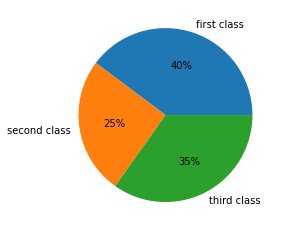

In [23]:
sum = df.groupby(['Pclass', 'Survived']).size()
survived = [sum[1][1], sum[2][1], sum[3][1]]
plt.pie(survived, labels = ['first class', 'second class', 'third class'], autopct='%1.0f%%');


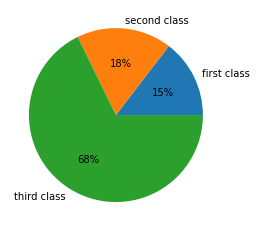

In [24]:
died = [sum[1][0], sum[2][0], sum[3][0]]
plt.pie(died, labels = ['first class', 'second class', 'third class'], autopct='%1.0f%%');

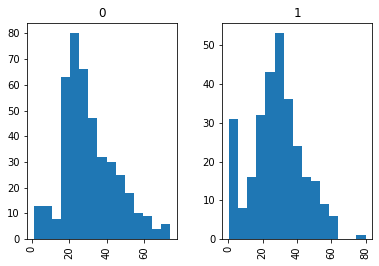

In [25]:
df.hist(grid = False, bins = 15, column='Age', by = 'Survived');